In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'online_retail_II.csv'
df = pd.read_csv(file_path) 

EDA

In [5]:
# Initial exploration
print("First few rows:")
print(df.head())
print("Shape of the dataset:", df.shape)

First few rows:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
Shape of the dataset: (1067371, 8)


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


There are missing values in the columns of Description and CustomerID, so we are going to remove it.

In [8]:
# Drop rows with missing values (Description and Customer ID)
df_cleaned = df.dropna()
print("Info after removing missing values:")
df_cleaned.info()

Info after removing missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [9]:
# Convert InvoiceDate to datetime
df_cleaned = df_cleaned.copy()
df_cleaned["InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"], errors='coerce')

In [10]:
# Confirm datetime conversion
print("After converting InvoiceDate:")
df_cleaned.info()

After converting InvoiceDate:
<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [11]:
# Check and remove duplicate rows
duplicate_rows = df_cleaned[df_cleaned.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

if not duplicate_rows.empty:
    print("Removing duplicate rows...")
    df_cleaned = df_cleaned.drop_duplicates()
else:
    print("No duplicate rows found.")

Number of duplicate rows: 26479
Removing duplicate rows...


In [12]:
# Final check
print("Cleaned DataFrame info:")
df_cleaned.info()

Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


In [13]:
print(f"Shape of the cleaned dataset: {df_cleaned.shape}")

Shape of the cleaned dataset: (797885, 8)


In [14]:
#Count the unique value of Customer in the dataset.
print("Total unique number of customer in the dataset:", df_cleaned["Customer ID"].nunique())
#Count the unique value of Invoice in the dataset.
print("Total unique number of Invoice in the dataset:", df_cleaned["Invoice"].nunique())
# Total number of products sold in the dataset
print("Total number of product in the dataset:", df_cleaned["Quantity"].sum())
# Total number of revenue in the dataset
print("Total value of revenue in the dataset:", (df_cleaned["Price"] * df_cleaned["Quantity"]).sum())

Total unique number of customer in the dataset: 5942
Total unique number of Invoice in the dataset: 44876
Total number of product in the dataset: 10055729
Total value of revenue in the dataset: 16289991.288000003


In [15]:
# Display descriptive statistics before handling negatives
print("Initial Descriptive Statistics:\n")
print(df_cleaned.describe().round(2))

Initial Descriptive Statistics:

        Quantity                    InvoiceDate      Price  Customer ID
count  797885.00                         797885  797885.00    797885.00
mean       12.60  2011-01-02 13:17:34.141160704       3.70     15313.06
min    -80995.00            2009-12-01 07:45:00       0.00     12346.00
25%         2.00            2010-07-02 09:47:00       1.25     13964.00
50%         5.00            2010-12-02 12:33:00       1.95     15228.00
75%        12.00            2011-07-31 15:50:00       3.75     16788.00
max     80995.00            2011-12-09 12:50:00   38970.00     18287.00
std       191.67                            NaN      71.39      1696.47


There are negative values in Quantity, that might be the cancellation of an order, we need to remove those and investigate the meaning of it.

In [17]:
# Check rows with negative Quantity
negative_quantity = df_cleaned[df_cleaned['Quantity'] < 0]
negative_quantity.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


We can observe that those records with negative Quantity have a "C" in the column of Invoice, which supports the assumption about cancellations.

In [19]:
# Filter out canceled orders (negative Quantity)
df_cleaned = df_cleaned[df_cleaned['Quantity'] >= 0]
print("Descriptive Statistics \n\n", df_cleaned.describe().round(2))

Descriptive Statistics 

         Quantity                    InvoiceDate      Price  Customer ID
count  779495.00                         779495  779495.00    779495.00
mean       13.51  2011-01-03 01:46:36.061116416       3.22     15320.26
min         1.00            2009-12-01 07:45:00       0.00     12346.00
25%         2.00            2010-07-02 14:39:00       1.25     13971.00
50%         6.00            2010-12-02 14:09:00       1.95     15246.00
75%        12.00            2011-08-01 13:48:00       3.75     16794.00
max     80995.00            2011-12-09 12:50:00   10953.50     18287.00
std       146.54                            NaN      29.67      1695.72


In [20]:
# Double-check if any 'C' invoices remain
df_cleaned["Invoice"].str.contains("C", na=False).any()

False

In [21]:
print("Descriptive Statistics After Cleaning:\n")
print(df_cleaned.describe().round(2))

Descriptive Statistics After Cleaning:

        Quantity                    InvoiceDate      Price  Customer ID
count  779495.00                         779495  779495.00    779495.00
mean       13.51  2011-01-03 01:46:36.061116416       3.22     15320.26
min         1.00            2009-12-01 07:45:00       0.00     12346.00
25%         2.00            2010-07-02 14:39:00       1.25     13971.00
50%         6.00            2010-12-02 14:09:00       1.95     15246.00
75%        12.00            2011-08-01 13:48:00       3.75     16794.00
max     80995.00            2011-12-09 12:50:00   10953.50     18287.00
std       146.54                            NaN      29.67      1695.72


Count reduced from 797,885 to 779,495 and the mean of Quantity increased (cancellations were mostly small negative values)

RFM

In [24]:
import datetime as dt
# Step 1: Calculate Frequency
customer_frequency = df_cleaned.groupby("Customer ID").agg({"Invoice": "nunique"}).reset_index()
customer_frequency.columns = ["Customer ID", "Frequency"]
customer_frequency.sort_values(by='Frequency', ascending=False) 

,Customer ID,Frequency
2541,14911.0,398
400,12748.0,337
5436,17841.0,211
2938,15311.0,208
739,13089.0,203
...,...,...
760,13111.0,1
3590,15968.0,1
3597,15975.0,1
3601,15979.0,1


In [25]:
# Step 2: Calculate Monetary
df_cleaned["TotalPrice"] = df_cleaned["Quantity"] * df_cleaned["Price"]
customer_monetary = df_cleaned.groupby("Customer ID").agg({"TotalPrice": "sum"}).reset_index()
customer_monetary.columns = ["Customer ID", "Monetary"]
customer_monetary.sort_values(by='Monetary', ascending=False) 

,Customer ID,Monetary
5695,18102.0,580987.04
2279,14646.0,528602.52
1791,14156.0,313437.62
2541,14911.0,291420.81
5053,17450.0,244784.25
...,...,...
4351,16738.0,3.75
1731,14095.0,2.95
2458,14827.0,0.00
1739,14103.0,0.00


In [26]:
# Step 3: Calculate Recency
#To find out the last date of purchase in this dataset for calculating the recency values.
df_cleaned["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [27]:
current_date = dt.datetime(2011, 12, 31)

In [28]:
# Convert 'InvoiceDate' to datetime if not already
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce')

# Calculate Recency for each customer
customer_recency = df_cleaned.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (current_date - x.max()).days
}).reset_index()

# Rename the column to 'Recency'
customer_recency = customer_recency.rename(columns={"InvoiceDate": "Recency"})

# Show the top 5 customers with the highest recency (longest since last purchase)
customer_recency_sorted = customer_recency.sort_values(by='Recency', ascending=False)
customer_recency.sort_values(by='Recency', ascending=False) 

,Customer ID,Recency
4663,17056.0,759
5192,17592.0,759
289,12636.0,759
1167,13526.0,759
2287,14654.0,759
...,...,...
333,12680.0,21
4609,17001.0,21
5091,17490.0,21
400,12748.0,21


In [29]:
# Step 4: Merge RFM values into one dataframe
customer_rfm = pd.merge(pd.merge(customer_recency, customer_frequency, on='Customer ID'), 
customer_monetary, on='Customer ID') 
customer_rfm.head() 

,Customer ID,Recency,Frequency,Monetary
0,12346.0,346,12,77556.46
1,12347.0,23,8,4921.53
2,12348.0,96,5,2019.40
3,12349.0,39,4,4428.69
4,12350.0,331,1,334.40


In [30]:
# Step 5: Descriptive statistics
customer_rfm.describe() 

,Customer ID,Recency,Frequency,Monetary
count,5881.000000,5881.000000,5881.000000,5881.000000
mean,15314.674205,221.992858,6.287196,2954.396237
std,1715.429759,209.489651,13.012879,14437.322635
min,12346.000000,21.000000,1.000000,0.000000
25%,13833.000000,46.000000,1.000000,341.900000
50%,15313.000000,116.000000,3.000000,865.600000
75%,16797.000000,400.000000,7.000000,2247.720000
max,18287.000000,759.000000,398.000000,580987.040000


In [31]:
# Step 6: Calculate quantiles
quantiles = customer_rfm.quantile(q = [0.25, 0.50, 0.75]) 
quantiles 

,Customer ID,Recency,Frequency,Monetary
0.25,13833.0,46.0,1.0,341.90
0.50,15313.0,116.0,3.0,865.60
0.75,16797.0,400.0,7.0,2247.72


Segmentation

In [33]:
# Step 7: RFM Segmentation
customer_rfm["Recency_Score"] = pd.qcut(customer_rfm["Recency"], 5, labels = [5, 4, 3, 2, 1]) 
customer_rfm["Frequency_Score"] = pd.qcut(customer_rfm["Frequency"].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
customer_rfm["Monetary_Score"] = pd.qcut(customer_rfm["Monetary"], 5, labels = [1, 2, 3, 4, 5])
customer_rfm.sample(10) 

,Customer ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
5208,17608.0,54,4,488.06,4,4,2
4314,16700.0,29,25,8830.77,5,5,5
4471,16859.0,165,7,1932.41,3,4,4
2533,14903.0,42,5,2795.33,4,4,4
2406,14774.0,549,1,241.45,1,1,1
3264,15639.0,155,3,1065.08,3,3,3
1907,14272.0,94,4,920.81,3,3,3
3113,15488.0,113,5,431.92,3,4,2
218,12565.0,309,1,145.92,2,1,1
5343,17747.0,133,1,71.40,3,2,1


In [34]:
# Step 8: Combine RFM scores
# Convert scores to numeric values (if needed)
customer_rfm['Recency_Score'] = pd.to_numeric(customer_rfm['Recency_Score'])
customer_rfm['Frequency_Score'] = pd.to_numeric(customer_rfm['Frequency_Score'])
customer_rfm['Monetary_Score'] = pd.to_numeric(customer_rfm['Monetary_Score'])

# Calculate RFM score
customer_rfm['RFM_Score'] = customer_rfm['Recency_Score'] + customer_rfm['Frequency_Score'] + customer_rfm['Monetary_Score']

# Assign segments based on RFM score
def assign_segment(score):
    if score >= 14:
        return 'Champions'
    elif score >= 12:
        return 'Loyal Customers'
    elif score >= 10:
        return 'Promising Customers'
    elif score >= 8:
        return 'Potential Loyalists'
    elif score >= 6:
        return 'New Customers'
    elif score >= 4:
        return 'About to Sleep'
    elif score >= 2:
        return 'At Risk'
    else:
        return 'Lost'

# Apply the segment assignment to the RFM score
customer_rfm['Segment'] = customer_rfm['RFM_Score'].apply(assign_segment)

# Count records by segment
segment_counts = customer_rfm['Segment'].value_counts()
print("\nCustomer Segment Distribution:")
print(segment_counts)

# Calculate and display segment percentages
print("\nSegment Percentages:")
print(segment_counts / len(customer_rfm) * 100)

# Merge the segments back to the original data for further analysis
full_df = pd.merge(df, customer_rfm[['Customer ID', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'RFM_Score', 'Segment']], on='Customer ID', how='left')



Customer Segment Distribution:
Segment
About to Sleep         989
Potential Loyalists    978
New Customers          939
Promising Customers    929
Loyal Customers        868
Champions              860
At Risk                318
Name: count, dtype: int64

Segment Percentages:
Segment
About to Sleep         16.816868
Potential Loyalists    16.629825
New Customers          15.966672
Promising Customers    15.796633
Loyal Customers        14.759395
Champions              14.623363
At Risk                 5.407244
Name: count, dtype: float64


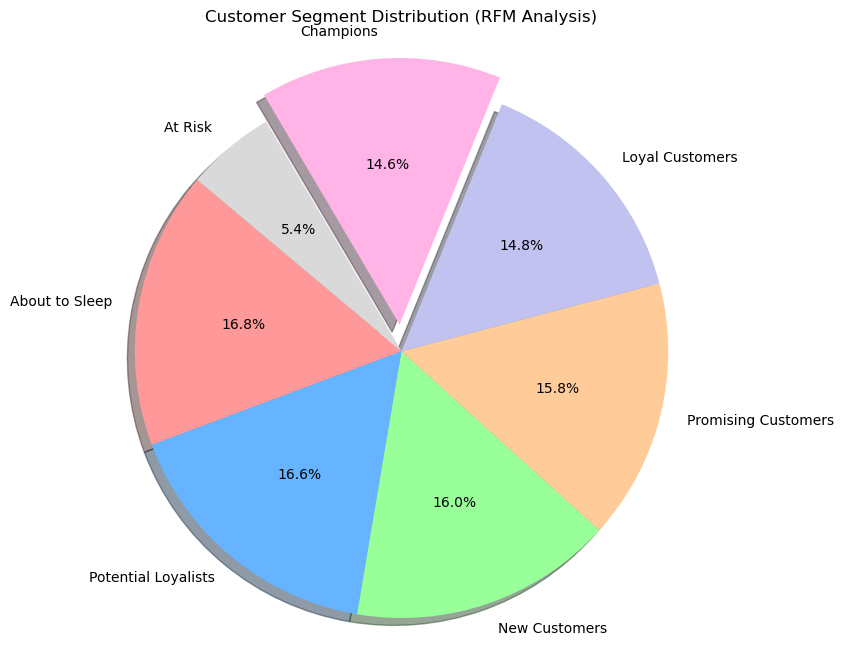

In [35]:
!pip install matplotlib
import matplotlib.pyplot as plt

labels = segment_counts.index
sizes = segment_counts.values
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0', '#ffb3e6', '#d9d9d9']
explode = [0.1 if label == 'Champions' else 0 for label in labels]

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Customer Segment Distribution (RFM Analysis)")
plt.show()

The pie chart shows relatively balanced distribution throughout customer segments, the biggest one being "About to Sleep" (16.8%) and the smallest being "At Risk" (5.4%).
Champions (14.6%) and Loyal Customers (14.8%) seek VIP rewards and individualized contact to retain their extremely valuable business. Promising Customers (15.8%) and New Customers (16.0%) need specialized educational materials and second-purchase offers to create stronger bonds. Potential Loyalists (16.6%) would benefit from subscription offers and emotional bonds. The threatening About to Sleep group (16.8%) demands re-engagement offers with preferred pricing, while At Risk customers (5.4%) need speedy win-back offers.
Priority must be given to engaging the 22% at risk of departure.

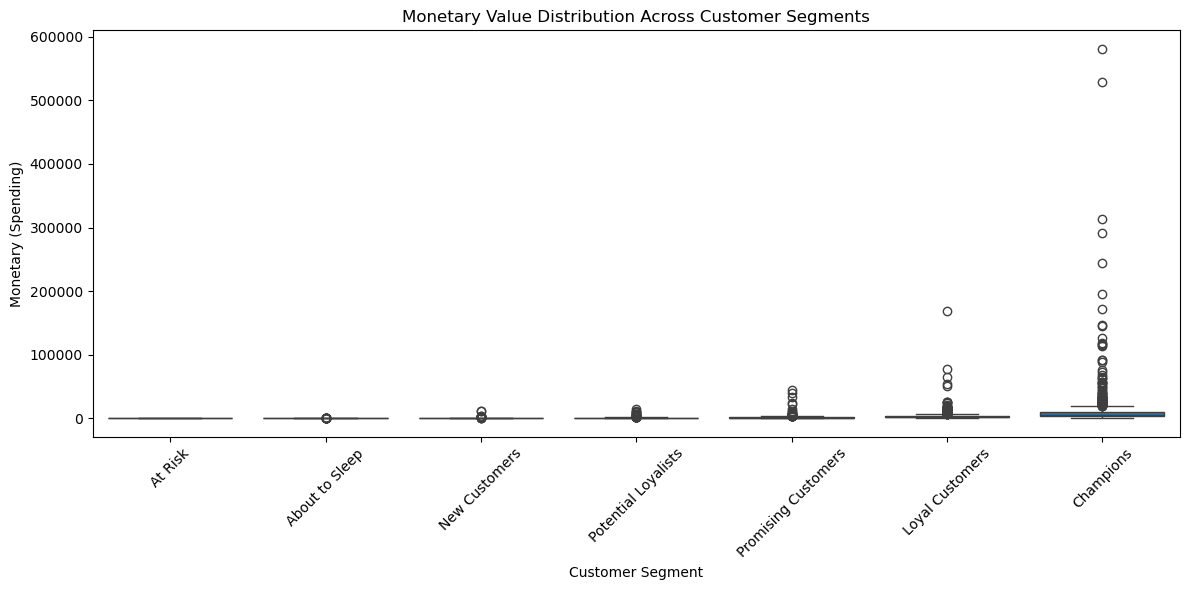

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_rfm, x='Segment', y='Monetary', order=[
    'At Risk', 'About to Sleep', 'New Customers', 'Potential Loyalists',
    'Promising Customers', 'Loyal Customers', 'Champions'
])
plt.xticks(rotation=45)
plt.title("Monetary Value Distribution Across Customer Segments")
plt.ylabel("Monetary (Spending)")
plt.xlabel("Customer Segment")
plt.tight_layout()
plt.show()

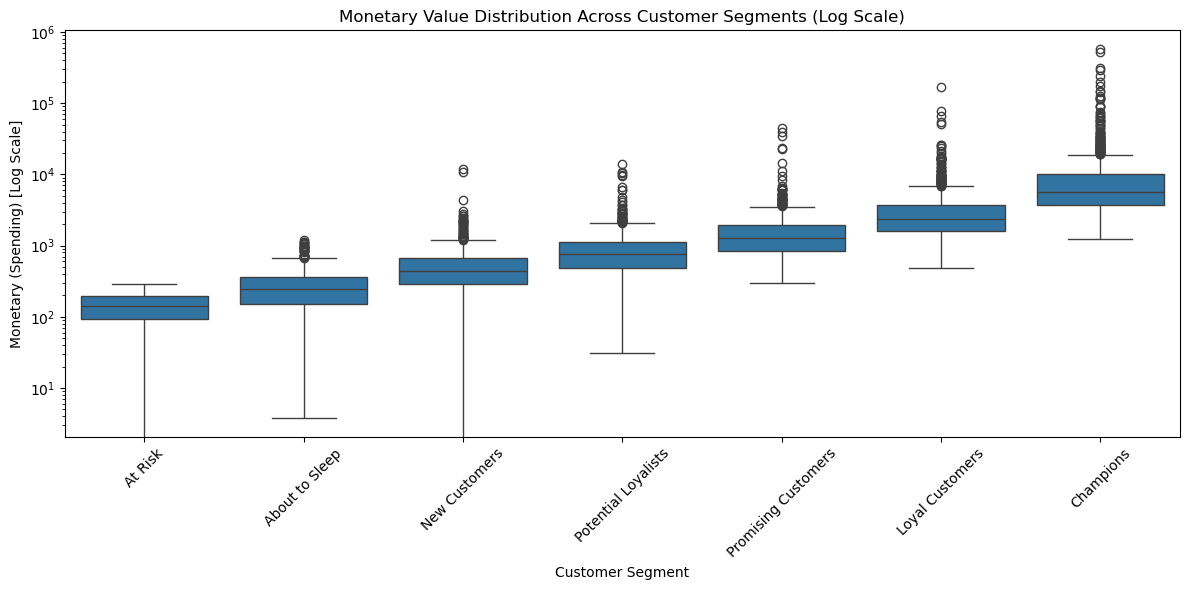

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_rfm, x='Segment', y='Monetary',
            order=['At Risk', 'About to Sleep', 'New Customers',
                   'Potential Loyalists', 'Promising Customers',
                   'Loyal Customers', 'Champions'])

plt.yscale('log')  # This fixes the compression issue
plt.xticks(rotation=45)
plt.title("Monetary Value Distribution Across Customer Segments (Log Scale)")
plt.ylabel("Monetary (Spending) [Log Scale]")
plt.xlabel("Customer Segment")
plt.tight_layout()
plt.show()

After RFM analysis, I observed that average monetary values increase progressively from 'At Risk' to 'Champions', validating the efficacy of the RFM model. Due to extremely outlier-prone data (e.g., $600,000+ in 'Champions'), I used a log transformation so it would be easier to visualize distribution across segments. This revealed a strongly evident positive correlation between level of engagement and customer value, which would be potentially useful for focused marketing.

Cohort Analysis

In [38]:
# Function to extract the first day of the month for a given date
def get_month(date):
    return dt.datetime(date.year, date.month, 1)

# Apply the get_month function to 'InvoiceDate' to create 'InvoiceMonth'
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].apply(get_month)

In [39]:
# Group by 'Customer ID' and calculate the first 'InvoiceMonth' for each customer as 'CohortMonth'
grouping = df_cleaned.groupby('Customer ID')['InvoiceMonth']
df_cleaned['CohortMonth'] = grouping.transform('min')
df_cleaned.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth,CohortMonth
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-01,2011-08-01
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,18.00,2011-12-01,2011-08-01


In [40]:
# Function to extract year, month, and day from a given column
def get_month_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Extract year, month, and day from 'InvoiceMonth' and 'CohortMonth'
invoice_year, invoice_month, _ = get_month_int(df_cleaned, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_month_int(df_cleaned, 'CohortMonth')

# Calculate the difference in months between 'InvoiceMonth' and 'CohortMonth'
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

# Create the 'CohortIndex' representing the number of months since the cohort's first purchase
df_cleaned['CohortIndex'] = year_diff * 12 + month_diff + 1

In [41]:
# Group by 'CohortMonth' and 'CohortIndex', then count unique 'Customer ID's in each group
cohort_data = df_cleaned.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().reset_index()

# Pivot the data to get cohort counts by 'CohortMonth' and 'CohortIndex'
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')

# Get the cohort size (the first month of each cohort)
cohort_size = cohort_counts.iloc[:, 0]

# Calculate retention by dividing cohort counts by the cohort size
retention = cohort_counts.divide(cohort_size, axis=0).round(3)

# Convert retention rates to percentages
retention_percentage = retention * 100
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,...,289.0,251.0,289.0,270.0,248.0,244.0,301.0,291.0,389.0,188.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,...,58.0,90.0,76.0,71.0,75.0,93.0,74.0,94.0,22.0,NaN
2010-02-01,376.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,...,75.0,60.0,61.0,54.0,86.0,86.0,61.0,22.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,...,75.0,77.0,69.0,78.0,89.0,94.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,32.0,...,46.0,41.0,44.0,53.0,66.0,17.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,15.0,21.0,...,32.0,35.0,42.0,39.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,34.0,24.0,22.0,32.0,...,33.0,36.0,55.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,26.0,21.0,27.0,27.0,21.0,...,32.0,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,28.0,19.0,16.0,20.0,22.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Show the number as percentage 
cohort_size = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_size, axis=0)
retention = retention.round(3) 
retention.round(3) * 100 

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12-01,100.0,35.3,33.4,42.5,38.0,35.9,37.7,34.2,33.6,36.2,...,30.3,26.3,30.3,28.3,26.0,25.5,31.5,30.5,40.7,19.7
2010-01-01,100.0,20.6,31.1,30.5,26.4,30.0,25.8,23.0,27.9,31.9,...,15.1,23.5,19.8,18.5,19.6,24.3,19.3,24.5,5.7,NaN
2010-02-01,100.0,23.7,22.3,29.0,24.5,19.9,19.1,28.5,25.3,27.4,...,19.9,16.0,16.2,14.4,22.9,22.9,16.2,5.9,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.2,23.3,20.3,24.6,30.2,27.5,10.8,...,16.9,17.4,15.6,17.6,20.1,21.2,7.9,NaN,NaN,NaN
2010-04-01,100.0,19.4,19.4,16.3,18.4,22.4,27.6,26.2,10.5,10.9,...,15.6,13.9,15.0,18.0,22.4,5.8,NaN,NaN,NaN,NaN
2010-05-01,100.0,15.7,16.9,17.3,17.7,25.6,21.3,12.6,5.9,8.3,...,12.6,13.8,16.5,15.4,4.7,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.4,18.9,20.4,23.0,28.5,12.6,8.9,8.1,11.9,...,12.2,13.3,20.4,5.2,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,15.6,18.3,29.6,29.0,14.0,11.3,14.5,14.5,11.3,...,17.2,23.7,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.4,29.6,32.1,17.3,11.7,9.9,12.3,13.6,13.0,...,19.8,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


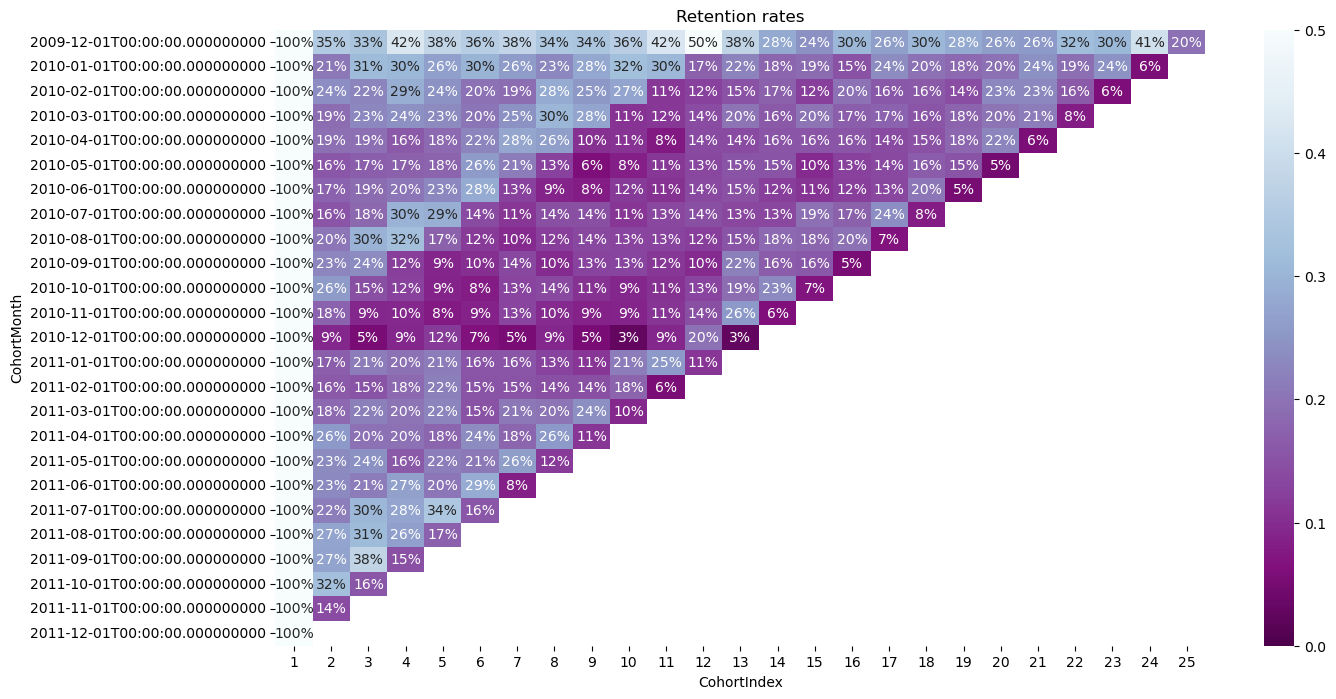

In [43]:
# Plot the retention heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

The cohort analysis shows that the December 2009 cohort was the largest to begin with, at 955 customers, possibly because of an aggressive acquisition campaign or seasonality. Later cohorts were smaller, which points to seasonality, a change in marketing efforts, or market saturation. Retention takes the shape of a classic downward slope, with a large drop-off in the first few months. For the December 2009 cohort, around 35% of customers were retained after one month, and retention would stabilize after 6-8 months.

Cohorts varied in their retention patterns, with first-month retention varying from 15-35%. Subsequent cohorts varied differently, with the December 2009 cohort retaining more in the long term than most other cohorts. Mid-2010 cohorts retained worse, and 2011 cohorts showed varying trends, possibly reflecting shifts in acquisition strategies or product development.

In order to strengthen retention, it is recommended to examine the strategies that worked in December 2009, prioritize churn prevention in the first 3 months, and seasonally direct marketing campaigns. It also recommends developing targeted engagement strategies for each cohort and attempting to convert the 25-30% of customers retained after 6 months into high-value, long-term customers.